<a href="https://colab.research.google.com/github/TheJojoJoseph/SNA_G23AI2100_Ass1/blob/main/G23AI2100_Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 1 - 100 MARKS

Submitted by Jojo Joseph (g23ai2100)


1. Mention the version of packages (like networkx) you are using.
2. This notebook will be converted to a python script for plagiarism check. So the name of the notebook should only be your rollnumber followed by assignment number. Ex <M21AI004_Ass1.ipynb>. Any other naming convention will carry penalty.
4. In case there is plagiarism all the students whose code is same will be awarded 0.
5. You are adviced to not copy your code from ChatGPT. If found you will be awarded 0.
5. You are adviced to read BOOK 3: Networks, Crowds, and Markets, Chapter 5 for this assignment.

# Q1 [40 marks]

Load the email_eu.txt edge list and convert this to a Networkx Graph [5 marks]

In [1]:
!wget https://filebin.net/eif70ribarjamump/email-Eu-core.txt #this file gets deleted every 7 days. This was created on 20/08/2024. Please reach out for a new link in case you are checking after 27/08/2024
file_path = 'email-Eu-core.txt'


--2024-09-20 10:03:21--  https://filebin.net/eif70ribarjamump/email-Eu-core.txt
Resolving filebin.net (filebin.net)... 88.99.137.18, 2a01:4f8:10a:2156::2
Connecting to filebin.net (filebin.net)|88.99.137.18|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-09-20 10:03:22 ERROR 404: Not Found.



Plot the degree distribution of the Graph [10 marks]

Graph with 1005 nodes and 16706 edges


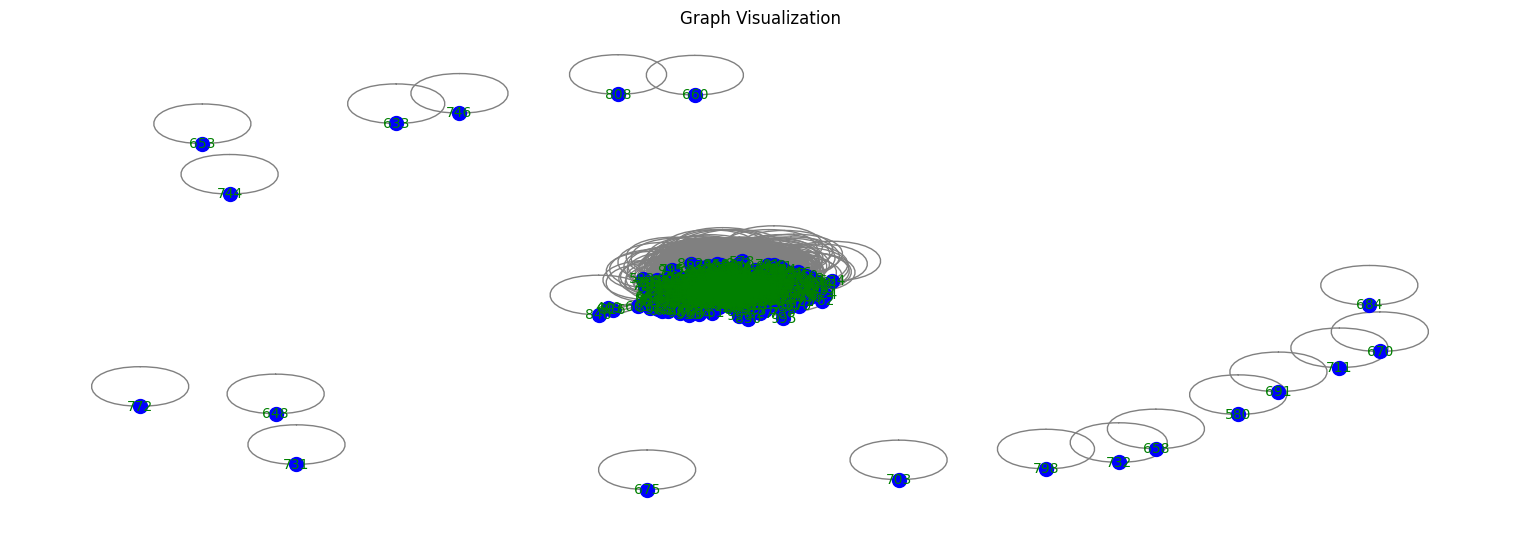

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Read the graph from the edge list file
G = nx.read_edgelist(file_path)

print(G)

# Plotting the G
plt.figure(figsize=(15, 5))
nx.draw(
    G,
    with_labels=True,
    node_size=100,
    font_size=10,
    font_color='green',
    node_color='blue',
    edge_color='grey'
)
plt.title("Graph Visualization")
plt.show()

For a random k between 0-20 find all the k-cores in the network [25 marks]

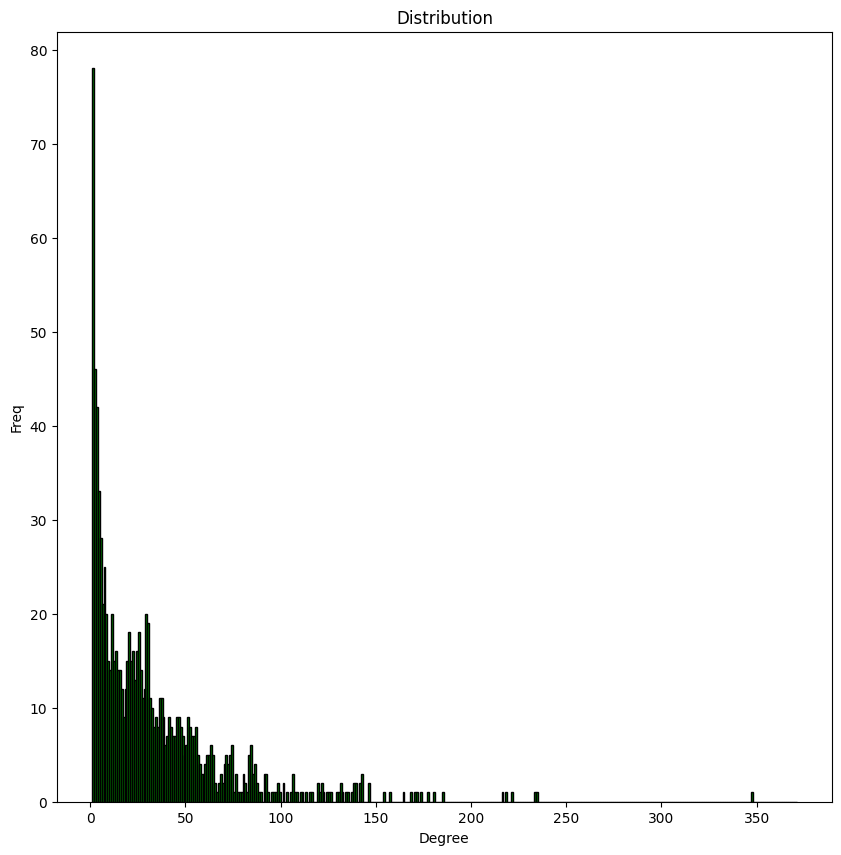

In [ ]:
degrees = [G.degree(n) for n in G.nodes()]

plt.figure(figsize=(10,10))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 25), color='green', edgecolor='black')
plt.title("Distribution")
plt.xlabel("Degree")
plt.ylabel("Freq")
plt.show()

In [ ]:
def kcore(graph, k):
    H = graph.copy()

    while True:
        nodes_to_remove = [node for node in H if H.degree(node) < k]

        if not nodes_to_remove:
            break

        H.remove_nodes_from(nodes_to_remove)

    return H

# Q2 [60 marks]

***Positive Edge Component (Supernode)***:  A supernode is connected internally via positive edges, and the only edges going between two different supernodes are negative. If there were a positive edge linking two different supernodes, we should have combined them together into a single
supernode.
For example in Figure 2 we can see that [9, 7, 12, 10, 13] can be considered to be a supernode with positive edges.

Cosider a networkx signed *graph* in ***Figure 1***


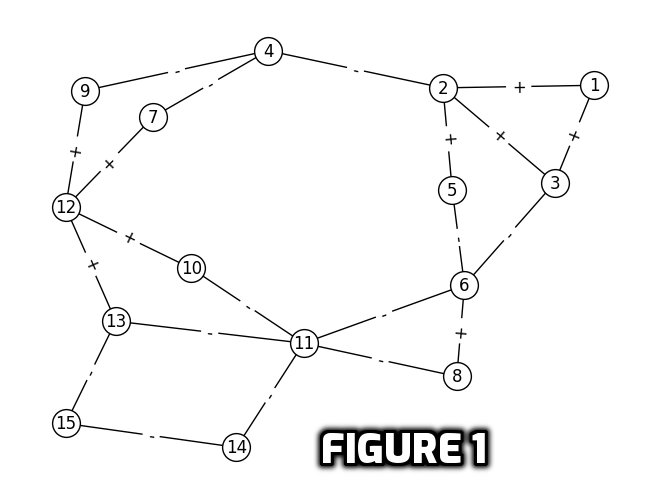

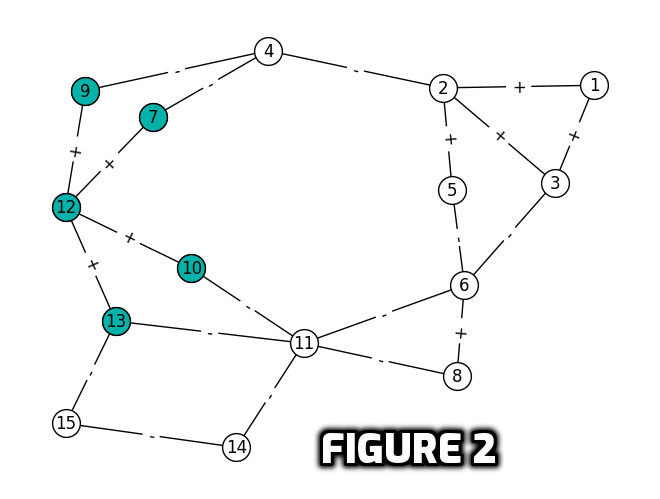

1. Write a code which takes a Networkx graph as input and outputs all the positive edge components or supernodes (The definition of supernodes is mentioned above). For more details you can refer to the network book - **Book 3 (Networks, Crowds, and Markets:), Chapter 5, Page 153 (138 in book)**.

NOTE: The supernodes should be in a list format example if there are three supernodes then we should return [[a, b, c], [d, e, f], [g]] where [a,b,c] is a supernode, [d,e,f] is a supernode and [g] is a supernode. [20 marks]

In [ ]:
def create_graph():
  graph = nx.Graph()
  nodes = list(range(1, 15))

  graph.add_nodes_from(nodes)

  edges = [
    (1, 2, "+"), (1, 3, "+"), (2, 3, "+"), (2, 5, "+"), (2, 4, "-"),
     (3, 6, "-"), (5, 6, "-"), (6, 11, "-"), (6, 8, "+"), (8, 11, "-"),
      (11, 10, "-"), (11, 13, "-"), (11, 14, "-"), (10, 12, "+"),
       (13, 12, "+"), (13, 15, "-"), (14, 15, "-"), (12, 7, "+"),
        (12, 9, "+"), (7, 4, "-"), (9, 4, "-")
  ]

  graph.add_nodes_from(range(1, 16))

  edge_label =[]
  for u, v, signs in edges:
    graph.add_edge(u, v, sign=signs)

  return graph

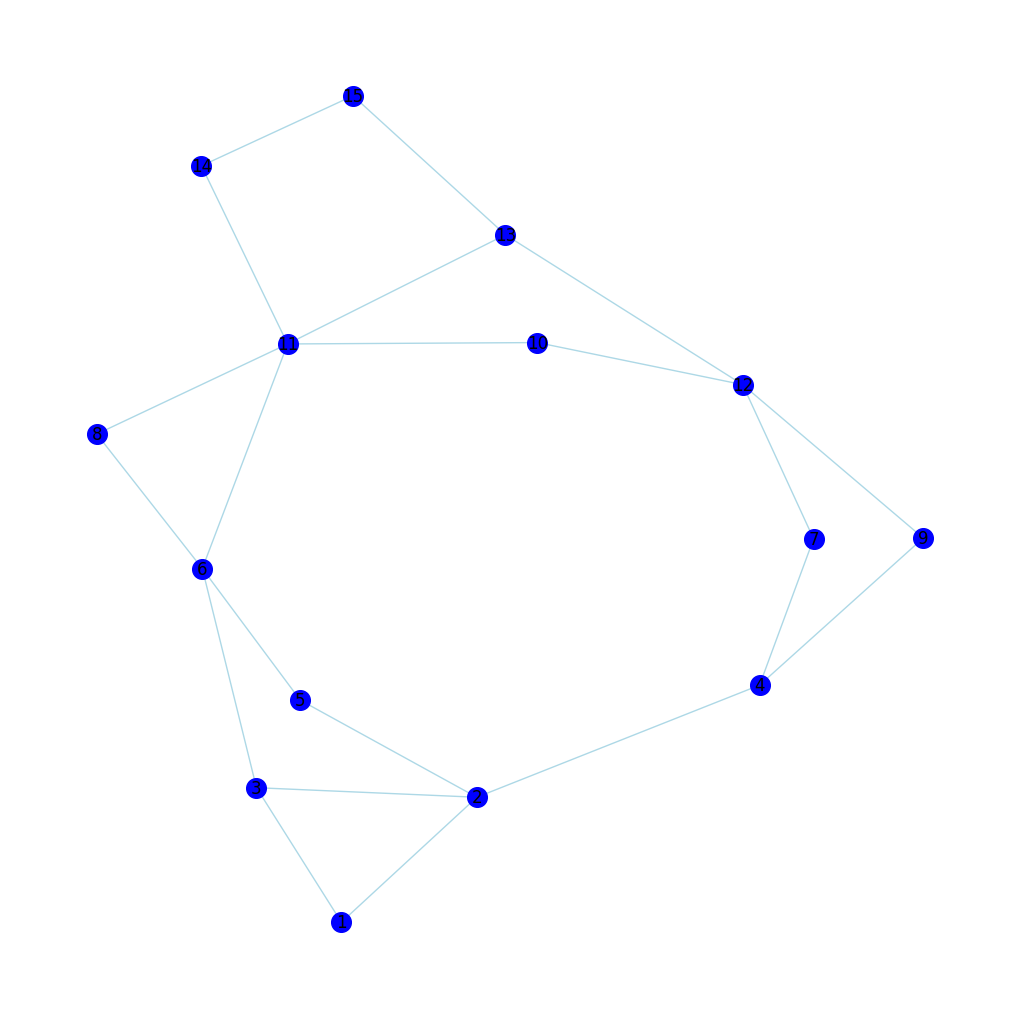

In [ ]:
Graph1 = create_graph()
plt.figure(figsize=(10,10))
pos = nx.spring_layout(Graph1)
nx.draw(Graph1, pos, with_labels=True,node_color='blue', edge_color='lightblue', node_size=200, font_size=12)

edge_labels = nx.get_edge_attributes(Graph1, 'weight')
nx.draw_networkx_edge_labels(Graph1, pos, edge_labels=edge_labels)
plt.show()

In [ ]:
def positive_components(G):
    positive_subgraph = nx.Graph()

    for u, v, d in G.edges(data=True):
        if d['sign'] == "+":
            positive_subgraph.add_edge(u, v)

    superNodes = list(nx.connected_components(positive_subgraph))
    print(superNodes)
    components = [list(component) for component in superNodes]

    return components


In [ ]:
print(positive_components(Graph1))

[{1, 2, 3, 5}, {8, 6}, {7, 9, 10, 12, 13}]
[[1, 2, 3, 5], [8, 6], [7, 9, 10, 12, 13]]


2. Now that you have found out the components (supernodes), write code that highlights the components as shown in Figure 2. Nodes in the same component must have the same color. [10 marks]

[{1, 2, 3, 5}, {8, 6}, {7, 9, 10, 12, 13}]


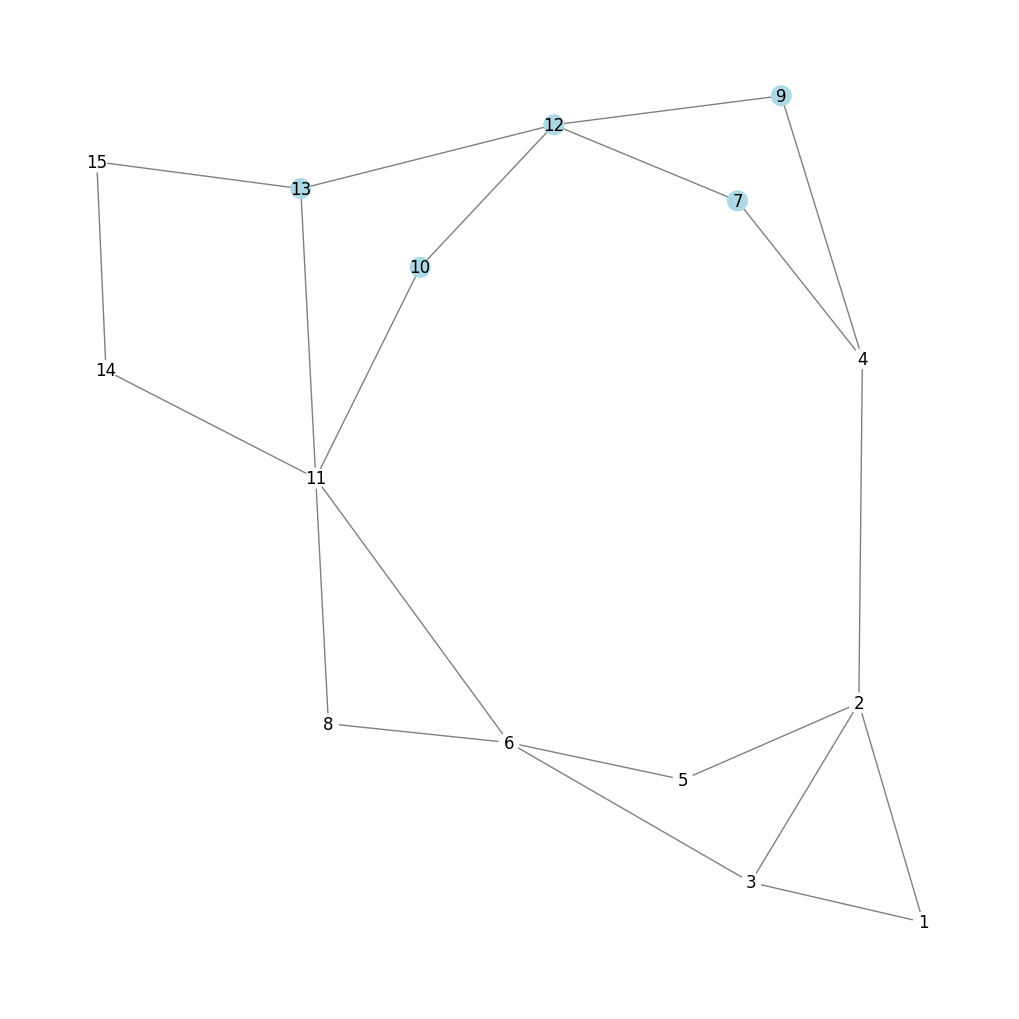

In [ ]:
component_colors = ['white', 'white', 'lightblue']

node_colors = {}
for i, component in enumerate(positive_components(Graph1)):
    color = component_colors[i % len(component_colors)]
    for node in component:
        node_colors[node] = color

for node in Graph1.nodes():
    if node not in node_colors:
        node_colors[node] = 'white'

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(Graph1)
nx.draw(Graph1, pos, with_labels=True, node_color=[node_colors[node] for node in Graph1.nodes()],
        edge_color='gray', node_size=200, font_size=12)

edge_labels = nx.get_edge_attributes(Graph1, 'weight')
nx.draw_networkx_edge_labels(Graph1, pos, edge_labels=edge_labels)
plt.show()

3. Take each supernode and create a networkx graph using these supernodes. Each supernode will be connected to other supernodes by a negative edge. You can refer to Figure 5.12 in Chapter 5, Page 153 (139 in book) of Book 3. Plot this graph using networkx. [10 marks]

[{1, 2, 3, 5}, {8, 6}, {7, 9, 10, 12, 13}]


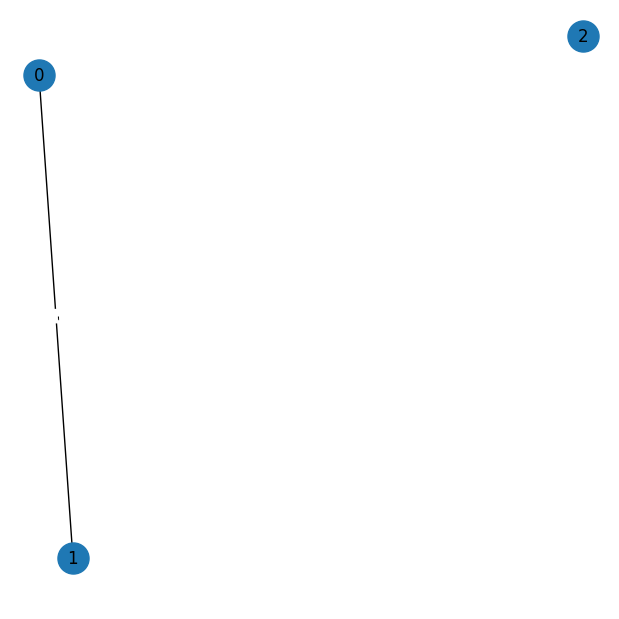

In [ ]:

Graph1 = create_graph()
supernodes = positive_components(Graph1)
supernode_graph = nx.Graph()

for i, supernode in enumerate(supernodes):
    supernode_graph.add_node(i, members=supernode)

for i in range(len(supernodes)):
    for j in range(i + 1, len(supernodes)):
        has_negative_edge = False
        for node1 in supernodes[i]:
            for node2 in supernodes[j]:
                if Graph1.has_edge(node1, node2) and Graph1[node1][node2]['sign'] == '-':
                    has_negative_edge = True
                    break
            if has_negative_edge:
                break

        if has_negative_edge:
            supernode_graph.add_edge(i, j, sign='-')

plt.figure(figsize=(6, 6))
pos = nx.spring_layout(supernode_graph)
nx.draw(supernode_graph, pos, with_labels=True, node_size=500, font_size=12)
edge_labels = nx.get_edge_attributes(supernode_graph, 'sign')
nx.draw_networkx_edge_labels(supernode_graph, pos, edge_labels=edge_labels)
plt.show()

4. Identify if there are any cycles containing odd number of negative edges (in the supernode graph created in the previous step). Color the nodes participating in this cycle. You may use networkx function for finding cycles.[10 marks]

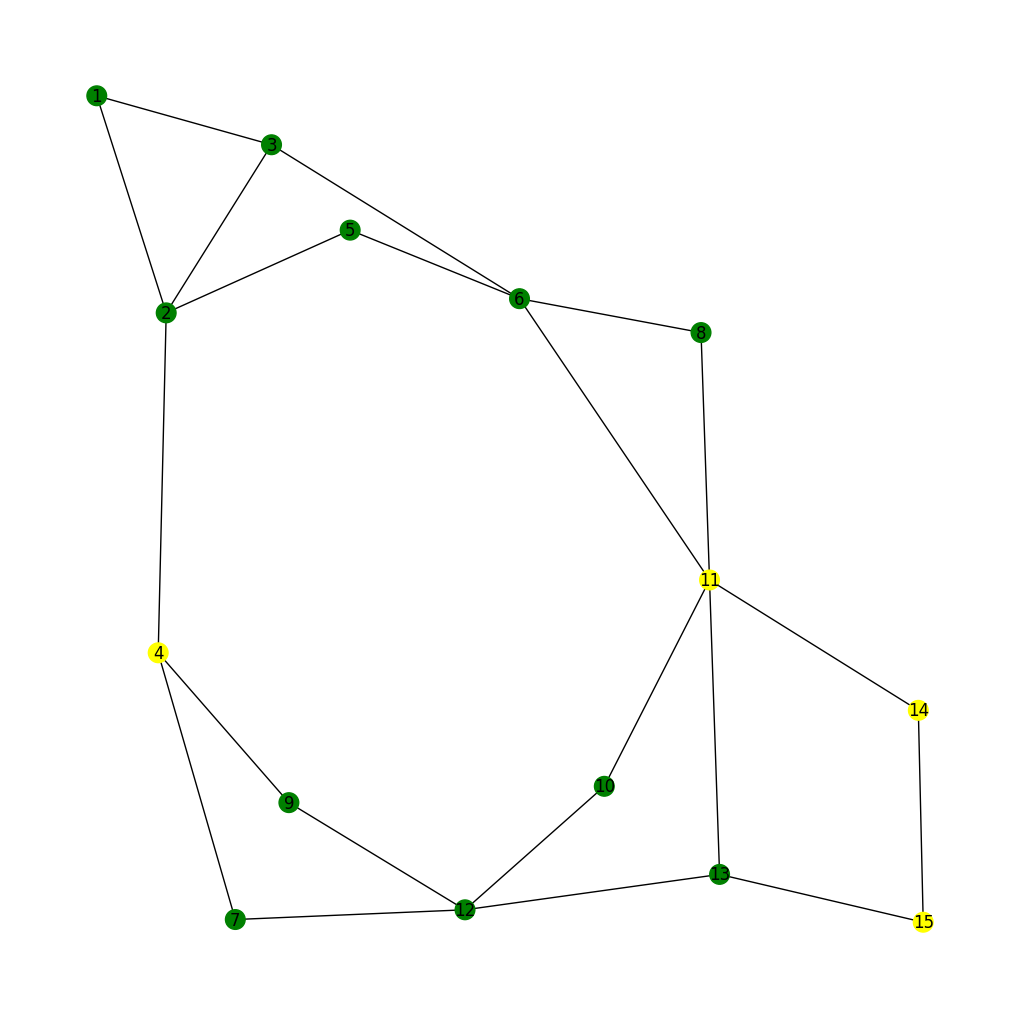

No odd-length negative cycles found.


In [ ]:
def find_odd_negative_cycles(graph):
  cycles = nx.simple_cycles(graph)
  odd_negative_cycles = []
  for cycle in cycles:
    negative_count = 0
    for i in range(len(cycle)):
      node1 = cycle[i]
      node2 = cycle[(i + 1) % len(cycle)]
      if graph[node1][node2]['sign'] == '-':
        negative_count += 1
    if negative_count % 2 == 1:
      odd_negative_cycles.append(cycle)
  return odd_negative_cycles

odd_negative_cycles = find_odd_negative_cycles(supernode_graph)

node_colors = {}
for node in Graph1.nodes():
    node_colors[node] = 'yellow'

for i, supernode in enumerate(supernodes):
  color = 'green'
  for cycle in odd_negative_cycles:
    if i in cycle:
      color = 'red'
      break
  for node in supernode:
    node_colors[node] = color

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(Graph1)
nx.draw(Graph1, pos, with_labels=True, node_color=[node_colors[node] for node in Graph1.nodes()],
        edge_color='black', node_size=200, font_size=12)
edge_labels = nx.get_edge_attributes(Graph1, 'weight')
nx.draw_networkx_edge_labels(Graph1, pos, edge_labels=edge_labels)
plt.show()

if odd_negative_cycles:
  print("Odd-length negative cycles found:")
  for cycle in odd_negative_cycles:
    print(cycle)
else:
  print("No odd-length negative cycles found.")

5. Plot the BFS tree of this new graph as shown in Figure 5.16 of the book. [10 marks]

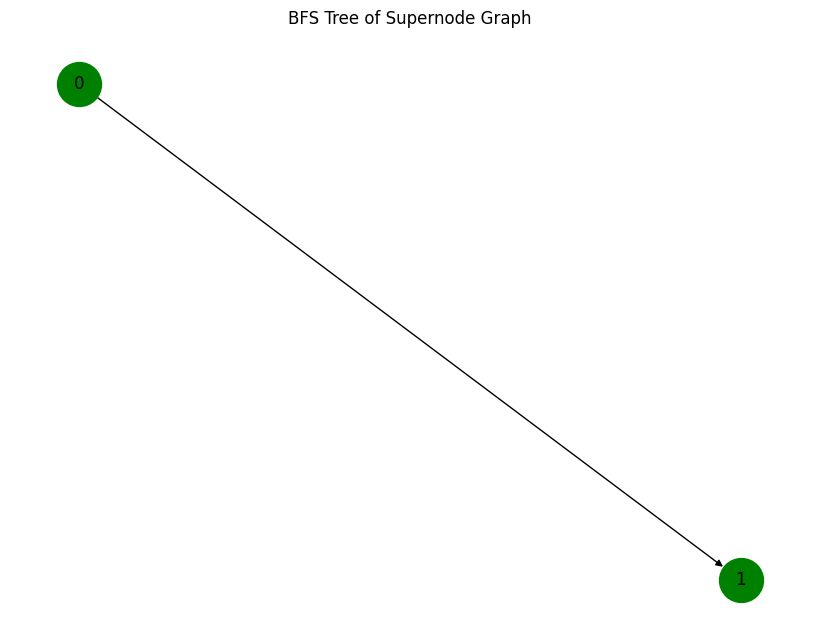

In [ ]:
root_node = 0
bfs_tree = nx.bfs_tree(supernode_graph, source=root_node)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(bfs_tree)
nx.draw(bfs_tree, pos, with_labels=True, node_size=1000, font_size=12, node_color='green')

edge_labels = nx.get_edge_attributes(bfs_tree, 'weight')
nx.draw_networkx_edge_labels(bfs_tree, pos, edge_labels=edge_labels)
plt.title("BFS Tree of Supernode Graph")
plt.show()
